## Submission Deadline

- All submissions must be made before 10:00 PM on Thursday, April 18, 2024.

## Submission Guidelines

- Format: Submissions are to be made in PDF format via Avenue to Learn, either individually or as a group of up to three members.
    - GitHub Repository: Your submission must include a link to a public GitHub repository containing the assignment.
    - Team Submissions: For group submissions, Question 15 must detail each member's contributions. Note that while there are no points allocated to Question 15, failure to provide this information will result in the assignment not being graded.

## Late Submissions

- 15% will be deducted from assignments each day after the due date (rounding up).

-   Assignments won't be accepted after 48 hours after the due date.

## Assignment Standards

Please ensure your assignment adheres to the following standards for submission:

- **Title Page Requirements:** Each submission must include a title page featuring your group members' names and student numbers. Assignments lacking a title page will not be considered for grading.
- **Individual Work:** While discussing homework problems with peers and group is permitted, the final written submission must be your group work.
- **Formatting Preferences:** The use of LaTeX for document preparation is highly recommended.
- **Font and Spacing:** Submissions must utilize an eleven-point font (Times New Roman or a similar font) with 1.5 line spacing. Ensure margins of at least 1 inch on all sides.
- **Submission Content:** Do not include the assignment questions within your PDF. Instead, clearly mark each response with the corresponding question number. Screenshots are not an acceptable form of submission under any circumstances.
- **Academic Writing:** Ensure that your writing and any references used are appropriate for an undergraduate level of study.
- **Originality Checks:** Be aware that the instructor may use various tools, including those available on the internet, to verify the originality of submitted assignments.
-  Assignment policy on the use of generative AI:
    -  Students are not permitted to use generative AI in this assignment. In alignment with [McMaster academic integrity policy](https://secretariat.mcmaster.ca/app/uploads/Academic-Integrity-Policy-1-1.pdf), it "shall be an offence knowingly to ...  submit academic work for assessment that was purchased or acquired from another source".  This includes work created by generative AI tools. Also state in the policy is the following, "Contract Cheating is the act of"outsourcing of student work to third parties" (Lancaster & Clarke, 2016, p. 639)
    with or without payment." Using Generative AI tools is a form of contract cheating.  Charges of academic dishonesty will be brought forward to the Office of Academic Integrity. 

\newpage

## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).
8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.
11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).
15. **Team Contributions:** Document each team member's specific contributions related to the questions above.
16. **Link** to the public GitHub repository.

### Notes

- This assignment encourages you to apply sophisticated machine learning methods to a vital healthcare challenge, promoting the development of critical analytical skills, teamwork, and practical problem-solving abilities in the context of chronic kidney disease diagnosis and treatment.
- Students can choose one classifer not covered in the lectures.

## question 1

In [872]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.cm as cm

from pyampute.exploration.mcar_statistical_tests import MCARTest

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

sns.set_theme(style="darkgrid")



[misc_chronic_kidney_disease_336]

In [873]:
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
kidney = pd.DataFrame(chronic_kidney_disease.data.features)
y = pd.DataFrame(chronic_kidney_disease.data.targets)
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [874]:
kidney.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


Based on the dataset, the classification problem is whether the patient has chronic kidney disease or not by using the data that was taken over a 2-month period with 25 features ( eg, red blood cell count, white blood cell count, etc)

## Question 2

In [875]:

obj_col = kidney.select_dtypes('object').columns
for i in obj_col:
    print(f"col_name: {i} value ---> {kidney[i].unique()}")

col_name: rbc value ---> [nan 'normal' 'abnormal']
col_name: pc value ---> ['normal' 'abnormal' nan]
col_name: pcc value ---> ['notpresent' 'present' nan]
col_name: ba value ---> ['notpresent' 'present' nan]
col_name: htn value ---> ['yes' 'no' nan]
col_name: dm value ---> ['yes' 'no' '\tno' nan]
col_name: cad value ---> ['no' 'yes' nan]
col_name: appet value ---> ['good' 'poor' nan]
col_name: pe value ---> ['no' 'yes' nan]
col_name: ane value ---> ['no' 'yes' nan]


In [876]:
# fix the typo error
kidney.loc[kidney['dm']== '\tno','dm'] = 'no'

In [877]:
for i in obj_col:
    print(f"{i}:{kidney[i].unique()},")

rbc:[nan 'normal' 'abnormal'],
pc:['normal' 'abnormal' nan],
pcc:['notpresent' 'present' nan],
ba:['notpresent' 'present' nan],
htn:['yes' 'no' nan],
dm:['yes' 'no' nan],
cad:['no' 'yes' nan],
appet:['good' 'poor' nan],
pe:['no' 'yes' nan],
ane:['no' 'yes' nan],


In [878]:
help_map = {
    "rbc":{'normal': 1 ,'abnormal':0},
   "pc":{'normal':1 ,'abnormal': 0},
    "pcc":{ 'present':1, 'notpresent':0},
    "ba":{'present':1,'notpresent' :0} ,
    "htn":{'yes':1 ,'no':0},
    "dm":{'yes':1, 'no':0},
    "cad":{'yes':1,'no':0 } ,
    "appet":{'good':1, 'poor':0 },
    "pe":{ 'yes':1,'no':0},
    "ane":{ 'yes':1,'no':0},
}

for i, j in help_map.items():
    kidney[i] = kidney[i].replace(j)


In [879]:
print(y['class'].unique())



['ckd' 'ckd\t' 'notckd']


In [880]:
#fix typo error
y = y.replace({'ckd': 1, 'notckd': 0, 'ckd\t': 1})
print(y['class'].unique())

[1 0]


In [881]:
cate_col = obj_col.to_list()
cate_col.append('sg')
cate_col.append('al')
cate_col.append('su')

for i in cate_col:
    kidney[i] = pd.Categorical(kidney[i])

float_col = kidney.select_dtypes('float').columns.to_list()


In [882]:
kidney.dtypes

age       float64
bp        float64
sg       category
al       category
su       category
rbc      category
pc       category
pcc      category
ba       category
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn      category
dm       category
cad      category
appet    category
pe       category
ane      category
dtype: object

In [883]:
# scaler = StandardScaler()

# kidney[float_col] = scaler.fit_transform(kidney[float_col])

## question 3


In [884]:
print(kidney.shape)
print(y.shape)

(400, 24)
(400, 1)


In [885]:
print(kidney.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     391 non-null    float64 
 1   bp      388 non-null    float64 
 2   sg      353 non-null    category
 3   al      354 non-null    category
 4   su      351 non-null    category
 5   rbc     248 non-null    category
 6   pc      335 non-null    category
 7   pcc     396 non-null    category
 8   ba      396 non-null    category
 9   bgr     356 non-null    float64 
 10  bu      381 non-null    float64 
 11  sc      383 non-null    float64 
 12  sod     313 non-null    float64 
 13  pot     312 non-null    float64 
 14  hemo    348 non-null    float64 
 15  pcv     329 non-null    float64 
 16  wbcc    294 non-null    float64 
 17  rbcc    269 non-null    float64 
 18  htn     398 non-null    category
 19  dm      398 non-null    category
 20  cad     398 non-null    category
 21  appet   399 non-

In [886]:
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   400 non-null    int64
dtypes: int64(1)
memory usage: 3.3 KB
None


In [887]:
chronic_kidney_disease.data.features.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [888]:
chronic_kidney_disease.data.targets.describe()


,class
count,400
unique,3
top,ckd
freq,248


In [889]:
chronic_kidney_disease.data.features

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


In [890]:
print(len(float_col))
len(cate_col)

11


13

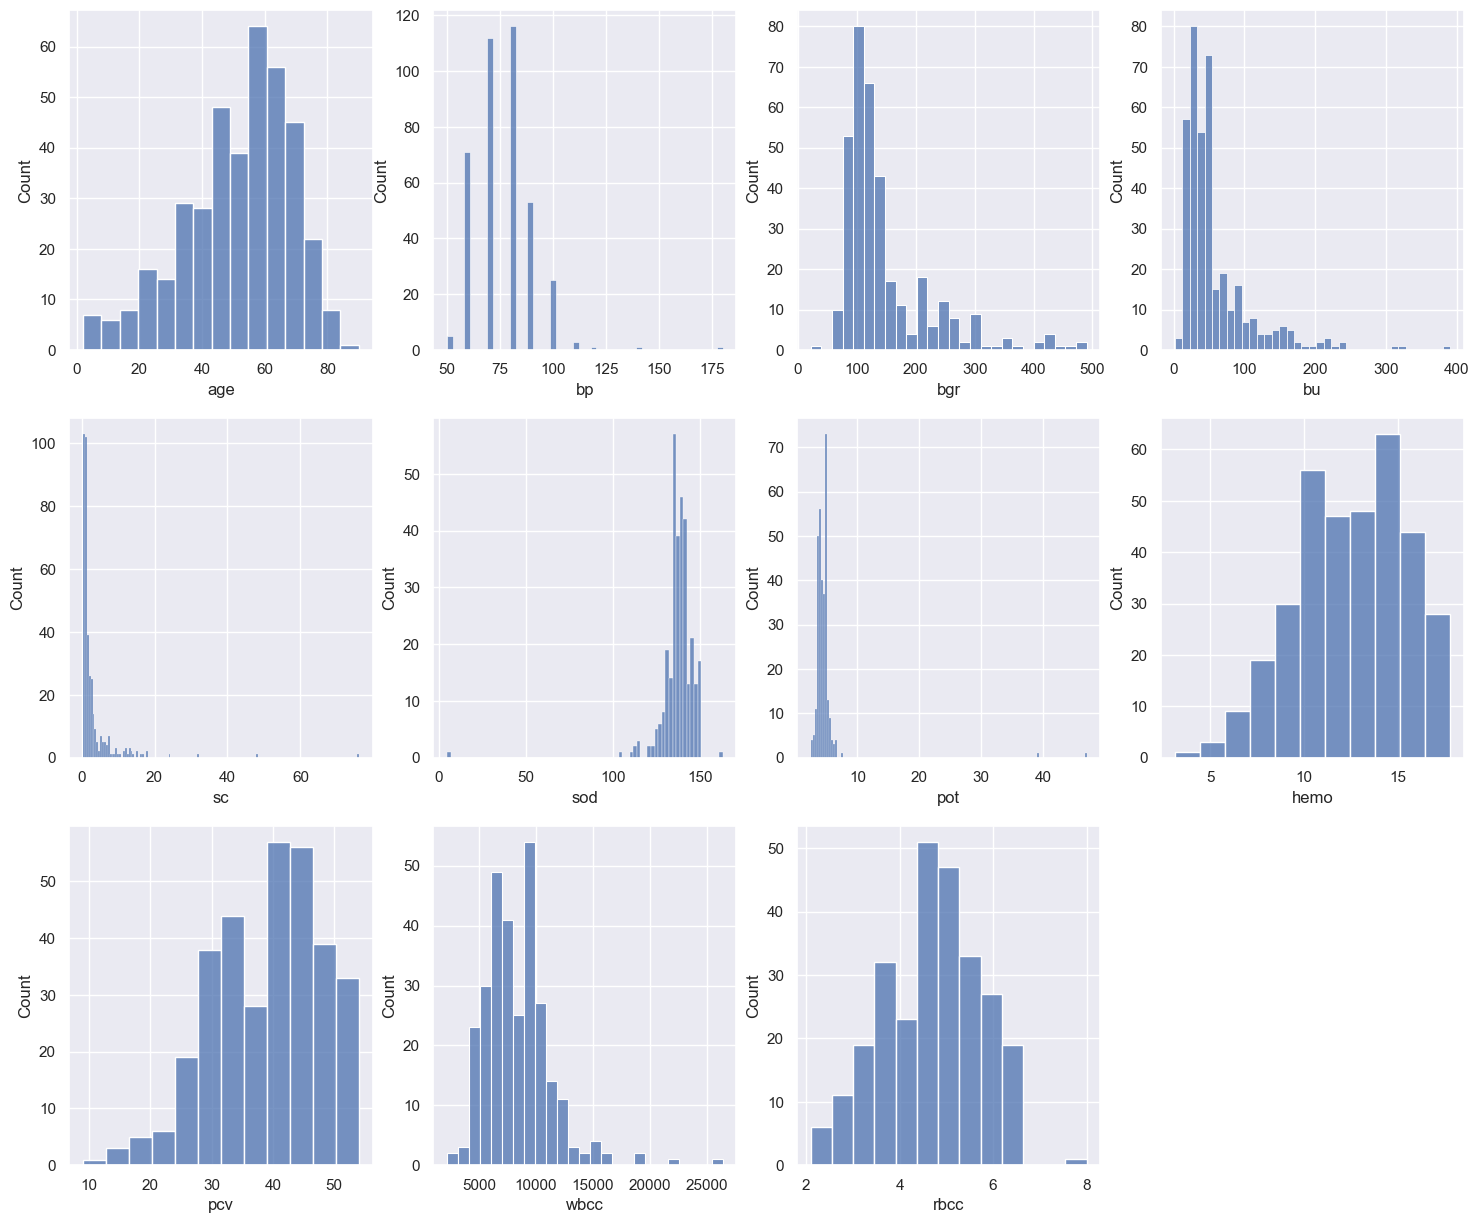

In [891]:
plt.figure(figsize = (18, 15))
plotnumber = 1
for i in float_col:
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber)
        sns.histplot(x=chronic_kidney_disease.data.features[i])
    plotnumber += 1
plt.show()

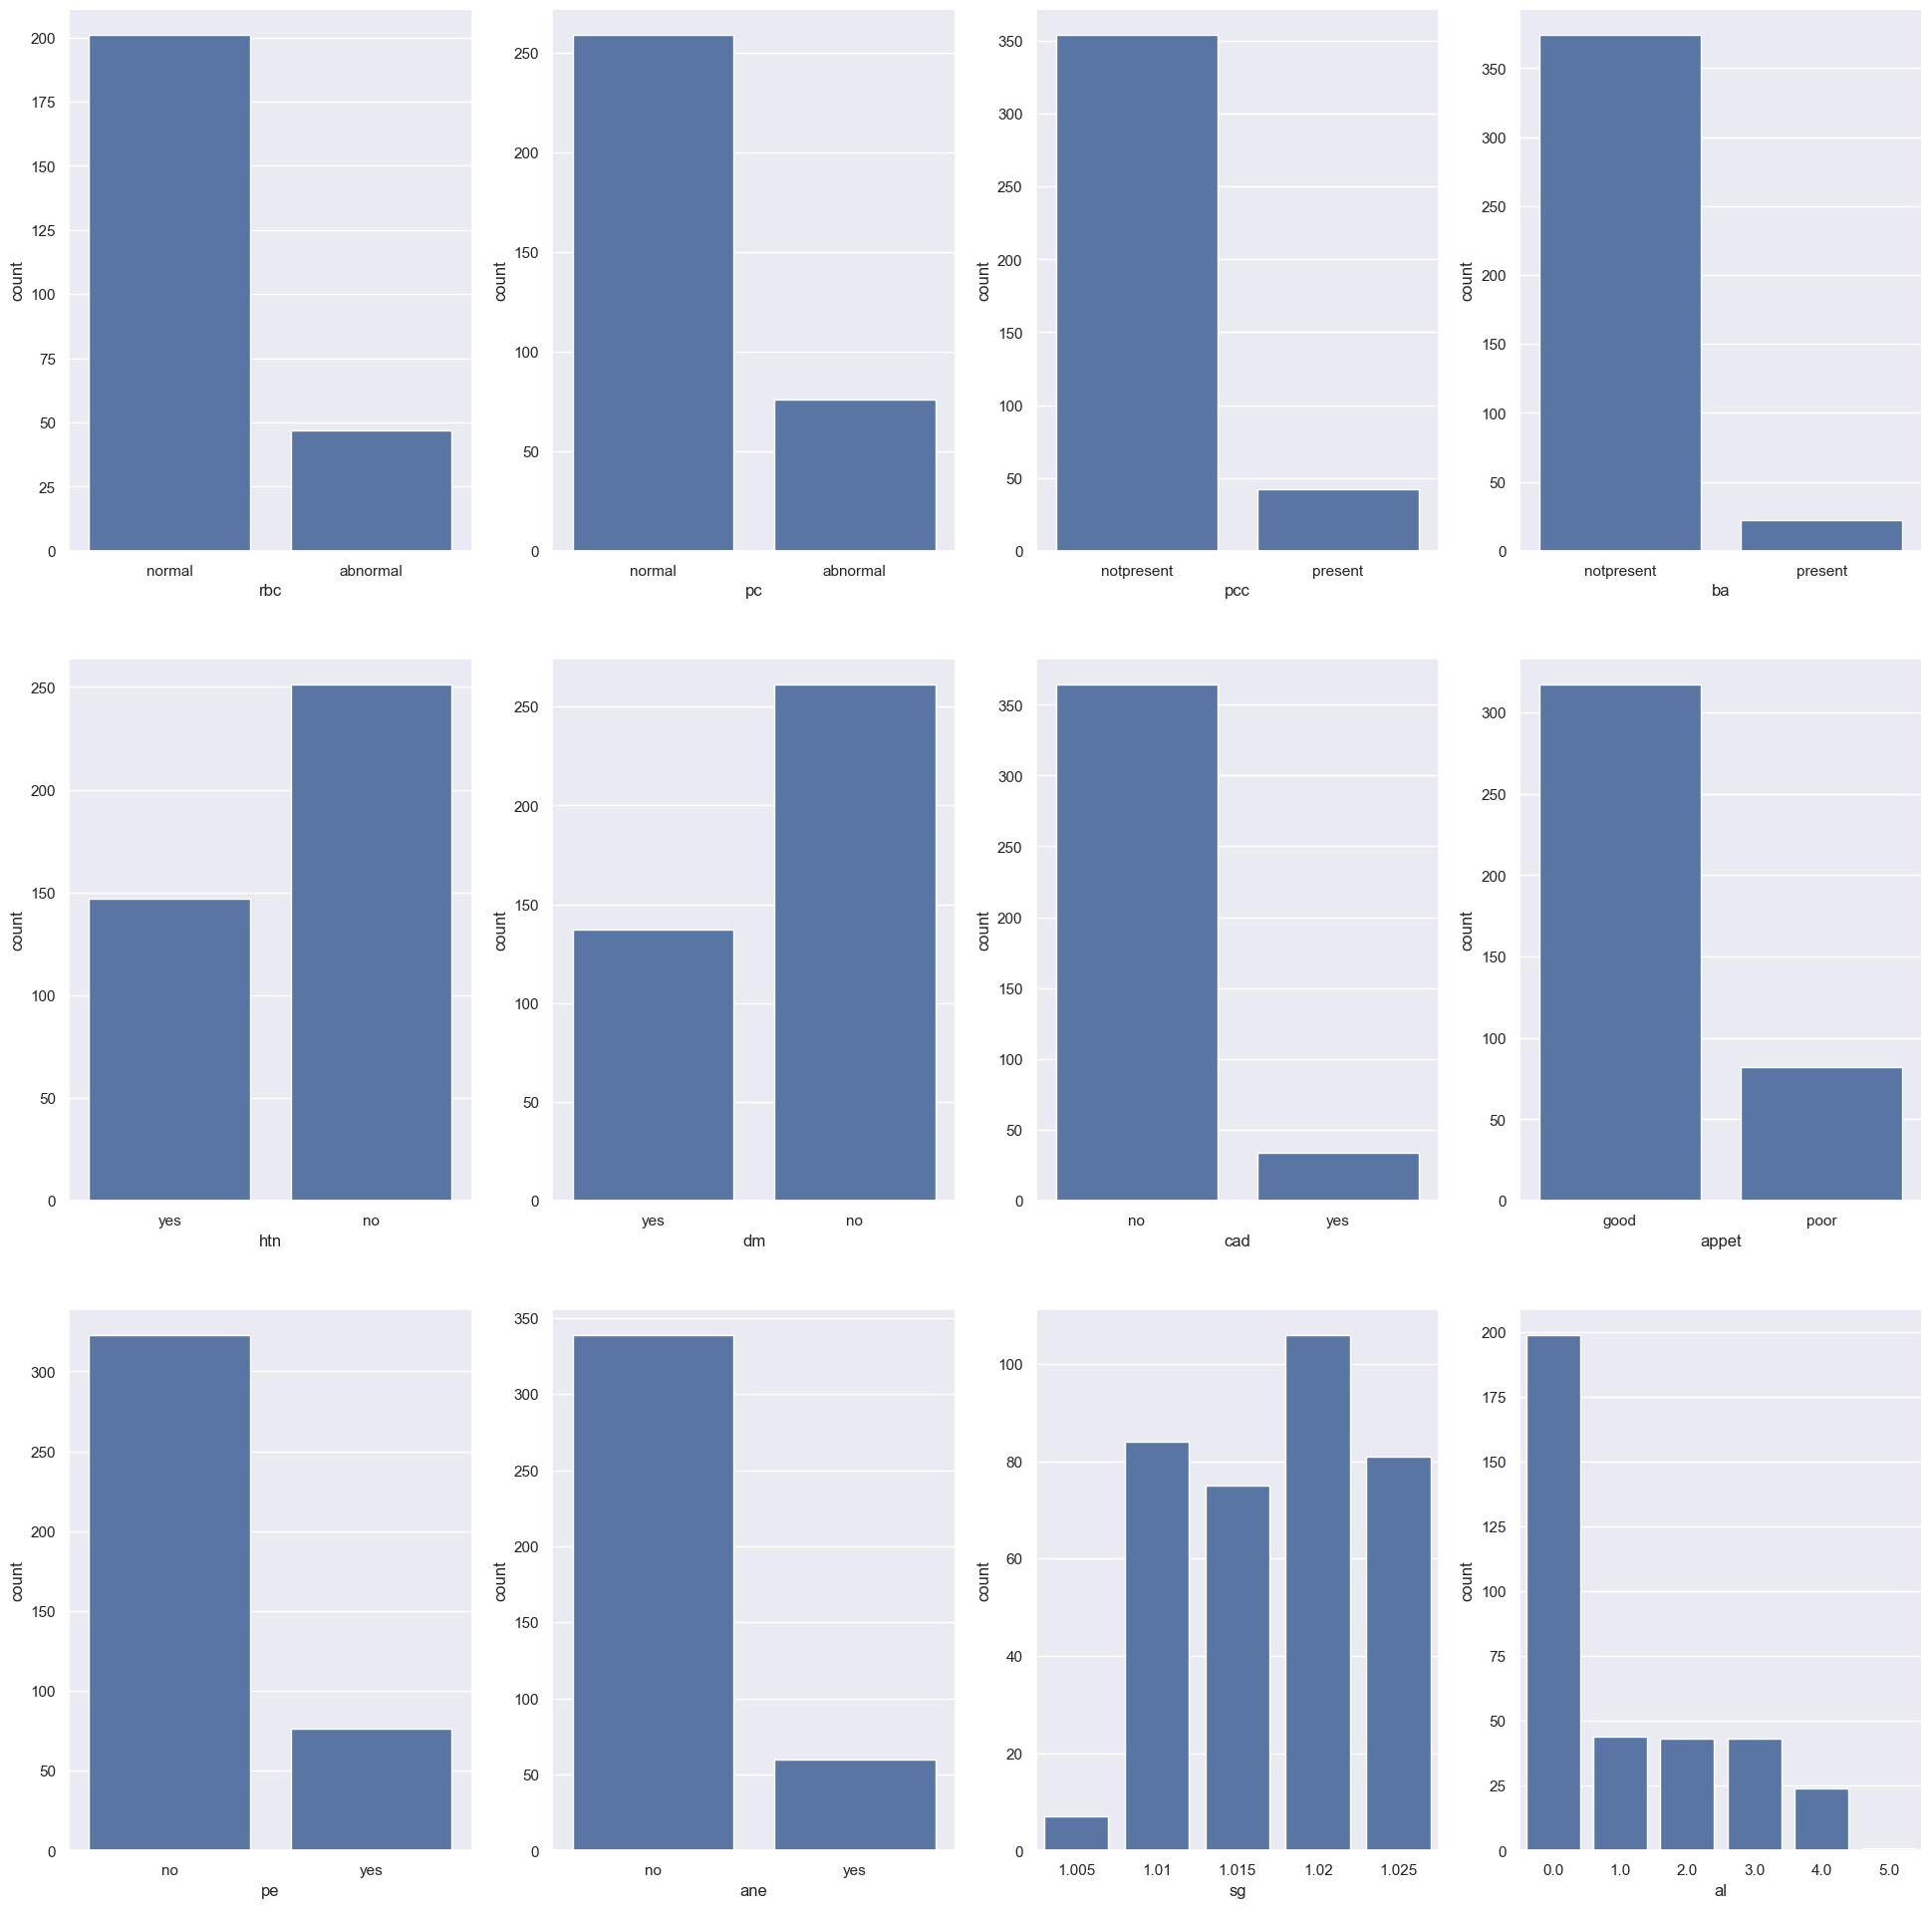

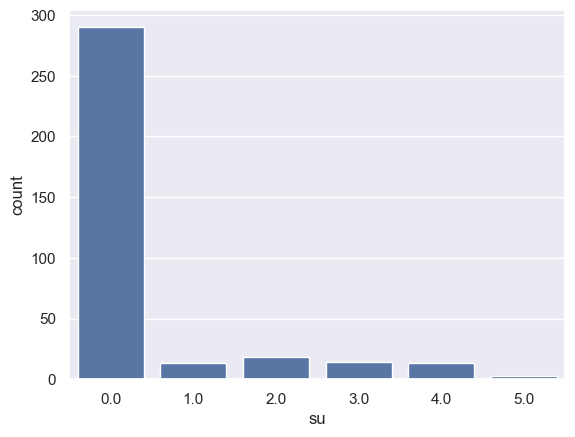

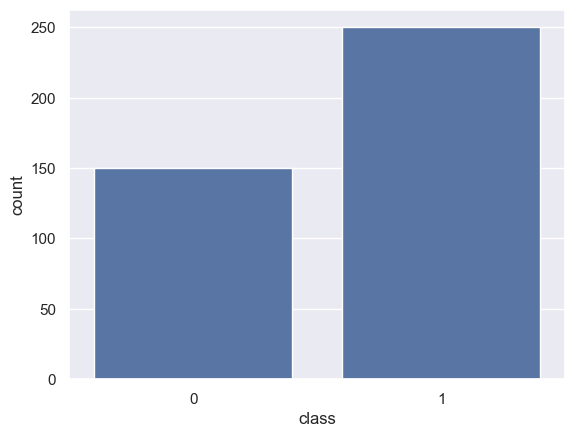

In [892]:
plt.figure(figsize = (24, 24))
number = 1

for i in cate_col:
    if number <= 12:
        ax = plt.subplot(3, 4, number)
        sns.countplot(x=chronic_kidney_disease.data.features[i])
    number += 1
plt.show()

sns.countplot(x=chronic_kidney_disease.data.features[cate_col[-1]])
plt.show()
sns.countplot(x=y['class'])
plt.show()

The dataset contains 400 observations and 24 features, and one target feature. 
We can see the distributions of all features like the central tendency, dispersion, and shape of the dataset's distribution.

We have Categorical variables ‘sg’, ‘al’, ‘su’, as well as binary data ‘rbc’, ‘pc’, ‘pcc’, ‘ba’, ‘htn’, ‘dm’, ‘cad’, ‘appet’, ‘pe’, ‘ane’, and binary target ‘class’. Discrete variables are ‘age’, ‘bp’, ‘bgr’, ‘bu’, ‘sod’, ‘pcv’, ‘wbcc’, and continuous variables ‘sc’, ‘pot’, ‘hemo’, ‘rbcc’.

there are 24 + class = 25 feature ( 11  numeric ,14  nominal)

## question 4

Text(0.5, 1.0, 'Correlation Heatmap')

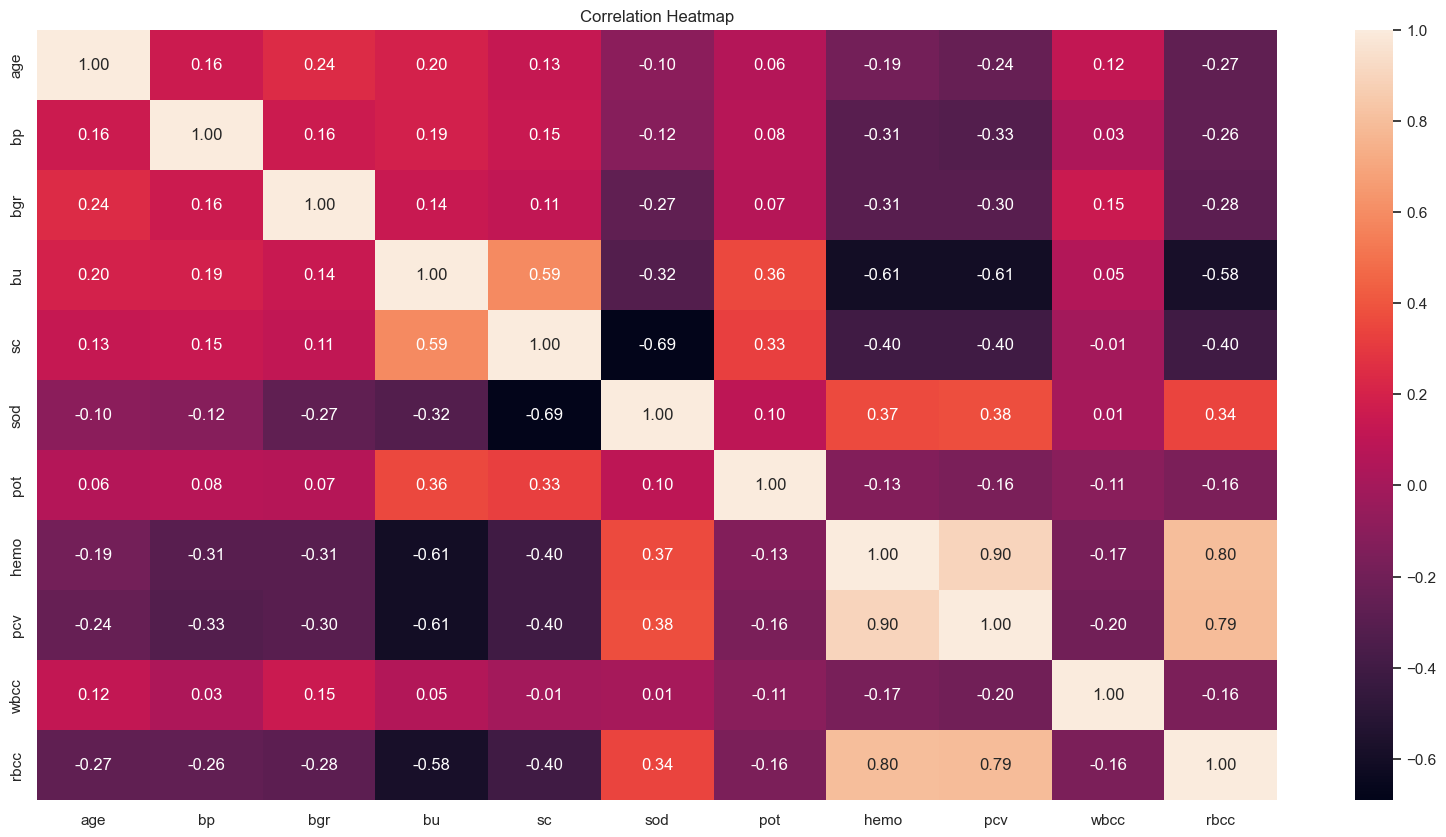

In [893]:
plt.figure(figsize=(20,10))
sns.heatmap(kidney[float_col].corr(), annot = True, fmt=".2f")
plt.title('Correlation Heatmap')

The packed cell volume (pcv) and hemoglobin (hemo) have the highest positive correlation, which is 0.90. sodium (sod) and serum creatinine (sc) have the highest negative correlation.
Positive numbers indicate two predictors are positively correlated and Negative numbers indicate two predictors are negatively correlated. The correlation matrix is symmetric, and the diagonal represents the correlation of each variable with itself, which is always 1


## question 5

In [894]:
print(f"before dropna length: {len(kidney)}")

# can't not use dropna, since it will cost remove lots of observation
# And target have no missing data
test_dropna = kidney.dropna()
print(f"after dropna length: {len(test_dropna)}")

before dropna length: 400
after dropna length: 158


In [895]:
knn_imputer = KNNImputer(n_neighbors=5)
X_knn_imputed = knn_imputer.fit_transform(kidney)

kidney = pd.DataFrame(X_knn_imputed,columns = kidney.columns)

# knn_imputer.set_output(transform='pandas')
# kidney[float_col] = knn_imputer.fit_transform(kidney[float_col])

In [896]:
# imputer = SimpleImputer(strategy="mean")
# imputer.set_output(transform='pandas')
# kidney[float_col] = imputer.fit_transform(kidney[float_col])

# imputer2 = SimpleImputer(strategy='most_frequent')
# imputer2.set_output(transform='pandas')
# kidney[cate_col] = imputer2.fit_transform(kidney[cate_col])

for i in cate_col:
    print(f"{i} --> {kidney[i].value_counts()}")

rbc --> rbc
1.0    204
0.0     60
0.6     40
0.4     37
0.2     30
0.8     29
Name: count, dtype: int64
pc --> pc
1.0    269
0.0     76
0.6     21
0.8     20
0.4      9
0.2      5
Name: count, dtype: int64
pcc --> pcc
0.0    357
1.0     42
0.2      1
Name: count, dtype: int64
ba --> ba
0.0    378
1.0     22
Name: count, dtype: int64
htn --> htn
0.0    252
1.0    147
0.2      1
Name: count, dtype: int64
dm --> dm
0.0    261
1.0    137
0.4      1
0.2      1
Name: count, dtype: int64
cad --> cad
0.0    365
1.0     34
0.2      1
Name: count, dtype: int64
appet --> appet
1.0    317
0.0     82
0.8      1
Name: count, dtype: int64
pe --> pe
0.0    323
1.0     76
0.2      1
Name: count, dtype: int64
ane --> ane
0.0    340
1.0     60
Name: count, dtype: int64
sg --> sg
1.020    108
1.010     84
1.015     84
1.025     81
1.005      7
1.018      7
1.013      6
1.014      5
1.014      5
1.012      5
1.016      3
1.016      2
1.019      1
1.019      1
1.015      1
Name: count, dtype: int64
al --> a

In [897]:
kidney.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [898]:
kidney.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

## question 6

In [899]:
z_score = np.abs(stats.zscore(kidney[float_col]))
outliners = np.where(z_score > 3)
outliners

(array([  2,   6,   6,   7,  10,  11,  21,  21,  48,  49,  61,  61,  61,
         67,  86,  98,  99, 103, 122, 128, 130, 130, 133, 145, 148, 153,
        158, 170, 181, 190, 193, 198, 211, 225, 238, 244, 246, 248, 249,
        249, 249], dtype=int64),
 array([ 2,  4,  5,  2,  2,  2,  4,  5,  9,  9,  3,  4,  6,  2,  2,  1,  1,
         3,  3,  6,  3,  9, 10,  3,  4,  3,  2,  2,  9,  9,  3,  9,  1,  2,
         3,  2,  3,  2,  3,  7,  8], dtype=int64))

<Axes: >

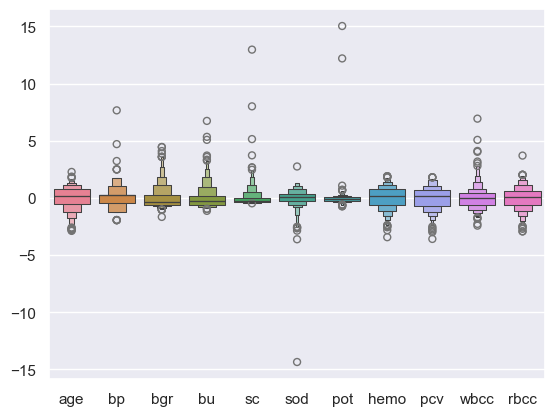

In [917]:
sns.boxenplot(kidney[float_col])

## question 7

c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

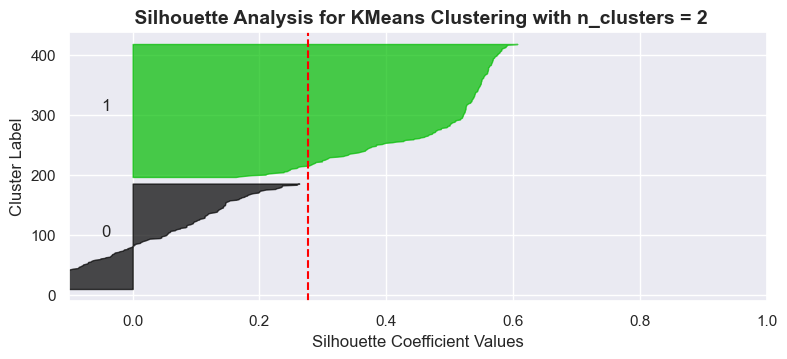

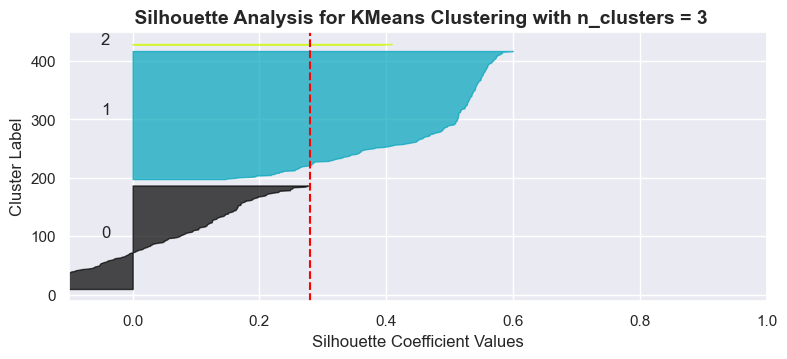

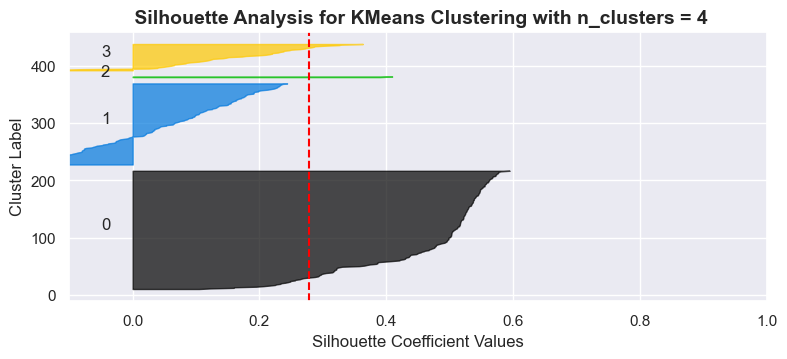

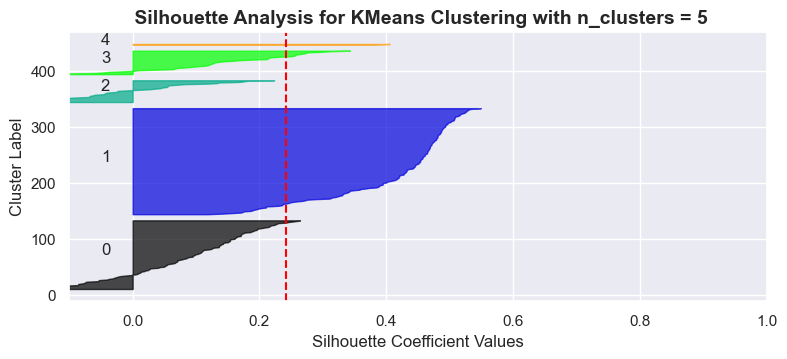

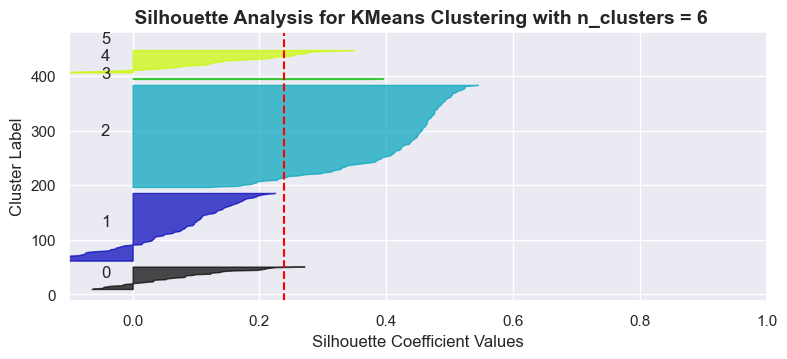

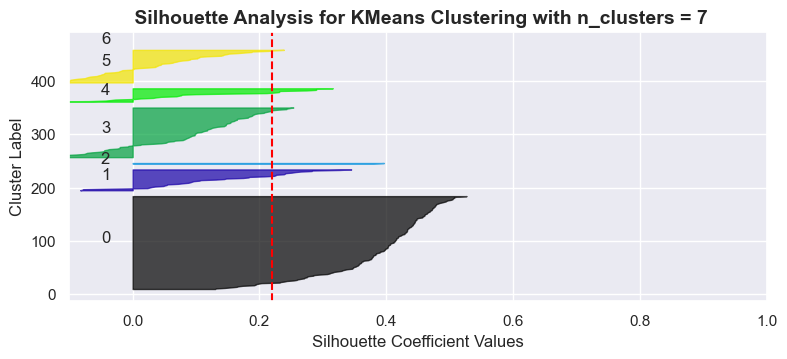

In [901]:
# test test
scaler = StandardScaler()
kidney[float_col] = pd.DataFrame(scaler.fit_transform(kidney[float_col]),columns=float_col)


k_values = list(range(2,8))
silhouette_scores = []
X_filled = kidney

for k in k_values:
    km = KMeans(n_clusters = k, n_init = 20, random_state=0)
    cluster_labels = km.fit_predict(X_filled)
    silhouette_avg_km = silhouette_score(X_filled, cluster_labels)

    silhouette_scores.append(silhouette_avg_km)

    sample_silhouette_values = silhouette_samples(X_filled, cluster_labels)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18/2, 7/2)
    ax1.set_xlim([-0.1, 1])

    y_lower = 10
    
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        f" Silhouette Analysis for KMeans Clustering with n_clusters = {k}",
        fontsize=14,
        fontweight="bold",
    )

c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


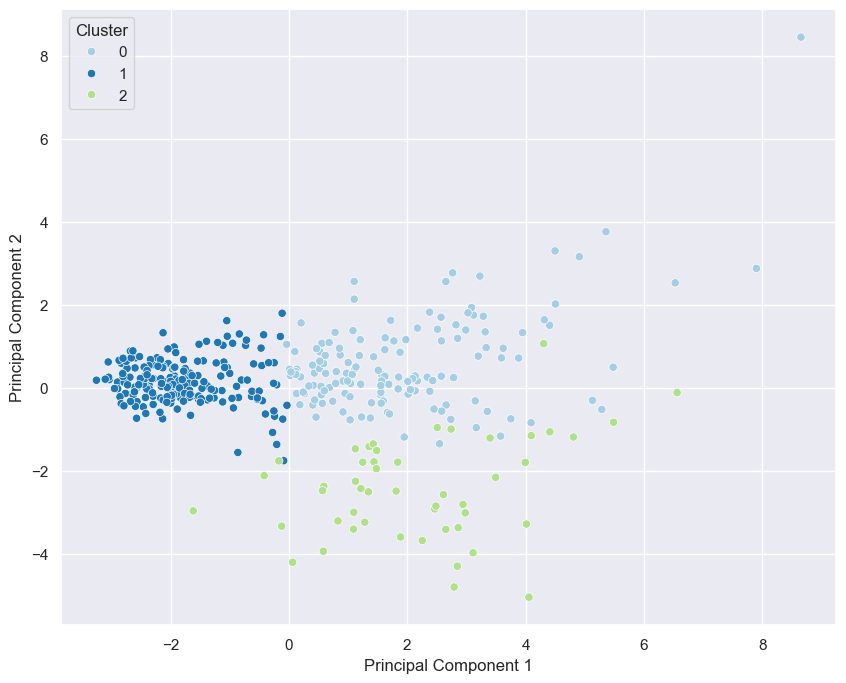

In [902]:
scaler = StandardScaler()
all_data_scaled = kidney


k_mean = KMeans(n_clusters=3, random_state=1)
clusters = k_mean.fit_predict(all_data_scaled)


pca = PCA(n_components=2)
principal_components = pca.fit_transform(all_data_scaled)


plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='Paired')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Text(0.5, 1.0, 'Scree Plot')

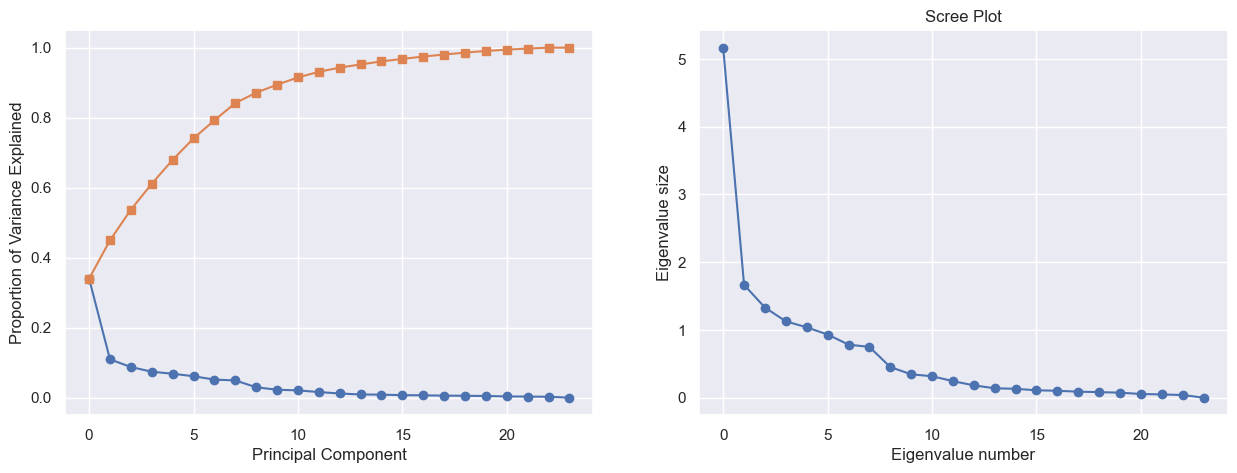

In [903]:

pca_nci = PCA()
fit = pca_nci.fit_transform(kidney)


fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


#left plot
ax1.plot(pca_nci.explained_variance_ratio_, '-o', label='Individual component')
ax1.plot( np.cumsum(pca_nci.explained_variance_ratio_), '-s', label='Cumulative')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_xlabel('Principal Component')
# ax1.set_xlim(0.75,6.25)
# ax1.set_ylim(0,1.05)
# ax1.set_xticks([1,2,3,4,5,6])
# ax1.legend(loc=2)


#right plot
ax2.plot(pca_nci.explained_variance_,marker='o')
ax2.set_xlabel("Eigenvalue number")
ax2.set_ylabel("Eigenvalue size")
ax2.set_title("Scree Plot")

## question 8


In [904]:
X_train, X_test, y_train, y_test = train_test_split(
    kidney,
    y,
    train_size = 0.7,
    test_size = 0.3, 
    random_state = 1,
    stratify = y,
)

In [905]:
X_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
103,1.449645,-0.464600,1.015,2.0,0.0,1.0,0.0,1.0,0.0,1.000126,...,-0.863059,-0.356463,1.632602,-0.569209,1.0,0.0,0.0,0.0,1.0,1.0
17,-0.248483,0.273446,1.015,1.2,0.4,0.4,0.8,0.0,0.0,-0.461789,...,-0.174424,-0.404342,-0.006242,-0.074928,1.0,0.0,0.0,0.0,0.0,0.0
254,-0.014258,-1.202647,1.025,0.0,0.0,1.0,1.0,0.0,0.0,-0.657581,...,0.151772,1.199620,-0.068085,0.554156,0.0,0.0,0.0,1.0,0.0,0.0
90,0.688415,1.749540,1.010,2.0,2.0,1.0,1.0,0.0,1.0,1.704978,...,0.151772,0.122332,0.511694,-0.569209,1.0,0.0,1.0,1.0,0.0,0.0
170,0.864083,-0.464600,1.015,2.0,5.0,0.2,1.0,0.0,0.0,3.884798,...,-0.029448,-0.715559,0.434390,-0.344536,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.219966,1.011493,1.015,0.8,0.8,0.6,0.6,0.0,0.0,-0.083257,...,-0.986288,-0.571920,0.712685,-0.636611,1.0,1.0,0.0,0.0,1.0,0.0
398,-2.005166,-1.202647,1.025,0.0,0.0,1.0,1.0,0.0,0.0,-0.461789,...,0.586699,1.439017,-0.493257,1.340511,0.0,0.0,0.0,1.0,0.0,0.0
197,0.337078,0.273446,1.016,1.0,0.4,0.2,0.6,0.0,0.0,0.759954,...,-2.095353,-0.883137,-1.614165,-1.917247,1.0,1.0,0.0,1.0,0.0,1.0
5,0.512747,1.011493,1.015,3.0,0.0,0.6,0.4,0.0,0.0,-0.983902,...,-0.138180,0.002633,-0.261345,-0.344536,1.0,1.0,0.0,1.0,1.0,0.0


In [906]:

float_col

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

## question 9

The data frame contains both categorical and numerical data, also the response variable is binary(ckd or notckd). In this case sernario decisions trees are a good choice. Decision Tree can handel mixed data types.Contain selection capability feature as well which can improve the generalizaion of the model. Thus I pick Decision Tree as my model. 

Random Forest method average multiple decision trees, reduces the likelihood of overfitting.It also dosen't require any feature scaling . It also can handle missing valued data very well. In this case sernario it is a very good method to try.

## question 10

In [907]:
#DecisionTree
dt_model = DecisionTreeClassifier(max_depth=1000,random_state=1) 
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=1000, random_state=1)

[Text(0.4230769230769231, 0.9166666666666666, 'hemo <= 0.17\ngini = 0.469\nsamples = 280\nvalue = [105, 175]\nclass = ckd'),
 Text(0.15384615384615385, 0.75, 'pcv <= 0.673\ngini = 0.039\nsamples = 149\nvalue = [3, 146]\nclass = ckd'),
 Text(0.07692307692307693, 0.5833333333333334, 'gini = 0.0\nsamples = 144\nvalue = [0, 144]\nclass = ckd'),
 Text(0.23076923076923078, 0.5833333333333334, 'sg <= 1.017\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = notckd'),
 Text(0.15384615384615385, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = ckd'),
 Text(0.3076923076923077, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = notckd'),
 Text(0.6923076923076923, 0.75, 'sg <= 1.02\ngini = 0.345\nsamples = 131\nvalue = [102, 29]\nclass = notckd'),
 Text(0.5384615384615384, 0.5833333333333334, 'rbcc <= 1.543\ngini = 0.153\nsamples = 24\nvalue = [2, 22]\nclass = ckd'),
 Text(0.46153846153846156, 0.4166666666666667, 'pcv <= 1.619\ngini = 0.083\nsamples = 23\nval

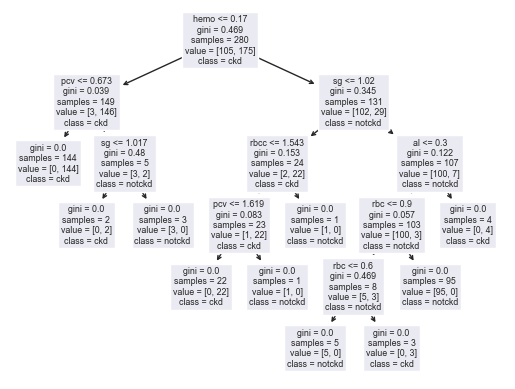

In [908]:
plot_tree(
    dt_model, 
    max_depth= 100, 
    feature_names = X_train.columns.tolist(), 
    class_names=['notckd', 'ckd']
)

In [909]:
#random forest
forest_model = RandomForestClassifier(max_depth=5)
forest_model.fit(X_train, y_train)

C:\Users\chris\AppData\Local\Temp\ipykernel_14464\1620030206.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5)

In [910]:
print(confusion_matrix(y_test, dt_model.predict(X_test)))
print(f"Accuracy is {round(accuracy_score(y_test, dt_model.predict(X_test))*100, 2)}%")

[[41  4]
 [ 0 75]]
Accuracy is 96.67%


In [911]:
print(classification_report(y_test, dt_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        45
           1       0.95      1.00      0.97        75

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [912]:
print(confusion_matrix(y_test, forest_model.predict(X_test)))
print(f"Accuracy is {round(accuracy_score(y_test, forest_model.predict(X_test))*100, 2)}%")

[[42  3]
 [ 0 75]]
Accuracy is 97.5%


In [913]:
print(classification_report(y_test, forest_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.96      1.00      0.98        75

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [941]:
n_estimatorss = [i for i in range(10,210,10)]

scores = []
for i in n_estimatorss:
    classifier = RandomForestClassifier(n_estimators=i)
    classifier.fit(X_train, y_train)
    scores.append(round(accuracy_score(y_test, classifier.predict(X_test))*100, 2))

#print(f"best n_estimators:{n_estimatorss[scores.index(max(scores))]} and the accuracy_score is {max(scores)}%")


C:\Users\chris\AppData\Local\Temp\ipykernel_14464\2439767835.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
C:\Users\chris\AppData\Local\Temp\ipykernel_14464\2439767835.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
C:\Users\chris\AppData\Local\Temp\ipykernel_14464\2439767835.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
C:\Users\chris\AppData\Local\Temp\ipykernel_14464\2439767835.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  class

Text(0.5, 0, 'n_estimators')

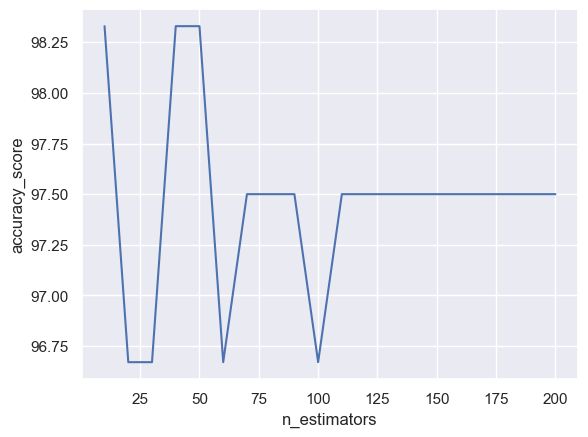

In [942]:
sns.lineplot(
    x= n_estimatorss,
    y=scores
)
plt.ylabel("accuracy_score")
plt.xlabel("n_estimators")

## question 11


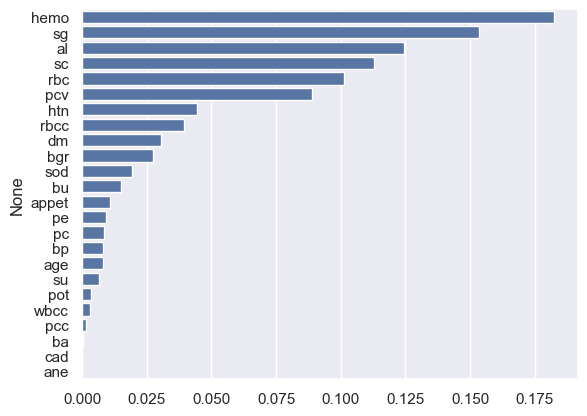

In [915]:
fea_imp = forest_model.feature_importances_

sorted_indices = fea_imp.argsort()[::-1]# read from the tail of the argsort to get greatest to least indices of the elements
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = fea_imp[sorted_indices]
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

we can see the `hemo`, `sg`, `al`, `sc`,`rbc`and `pcv` have obvious influence of random forest model.

## question 12

In [944]:
dt_model = DecisionTreeClassifier(max_depth=1000,random_state=1) 
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=1000, random_state=1)

In [945]:
#random forest
forest_model = RandomForestClassifier(n_estimators=n_estimatorss[scores.index(max(scores))])
forest_model.fit(X_train, y_train)

C:\Users\chris\AppData\Local\Temp\ipykernel_14464\3864576791.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [946]:
print(confusion_matrix(y_test, dt_model.predict(X_test)))
print(f"Accuracy is {round(accuracy_score(y_test, dt_model.predict(X_test))*100, 2)}%")
print(classification_report(y_test, dt_model.predict(X_test)))

[[41  4]
 [ 0 75]]
Accuracy is 96.67%
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        45
           1       0.95      1.00      0.97        75

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [947]:
print(confusion_matrix(y_test, forest_model.predict(X_test)))
print(f"Accuracy is {round(accuracy_score(y_test, forest_model.predict(X_test))*100, 2)}%")
print(classification_report(y_test, forest_model.predict(X_test)))

[[42  3]
 [ 0 75]]
Accuracy is 97.5%
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.96      1.00      0.98        75

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



ramdom forest model have 97.5% accuracy, and desiction tree model have 96.67 accuracy. The ramdom forest model will give a higher accuracy.

## question 13

In [948]:
new_forest_model = RandomForestClassifier()

new_forest_model.fit(kidney,y)


C:\Users\chris\AppData\Local\Temp\ipykernel_14464\2498465316.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  new_forest_model.fit(kidney,y)


RandomForestClassifier()

In [949]:
print(confusion_matrix(y, forest_model.predict(kidney)))
print(f"Accuracy is {round(accuracy_score(y, forest_model.predict(kidney))*100, 2)}%")
print(classification_report(y, forest_model.predict(kidney)))

[[147   3]
 [  0 250]]
Accuracy is 99.25%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       150
           1       0.99      1.00      0.99       250

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



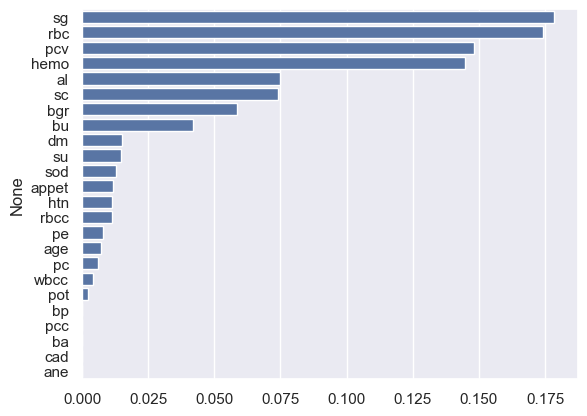

In [951]:
fea_imp = forest_model.feature_importances_

sorted_indices = fea_imp.argsort()[::-1]# read from the tail of the argsort to get greatest to least indices of the elements
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = fea_imp[sorted_indices]
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

since we have more obveration, because of no test set. So the accuracy score is higher then the model with train, test set.

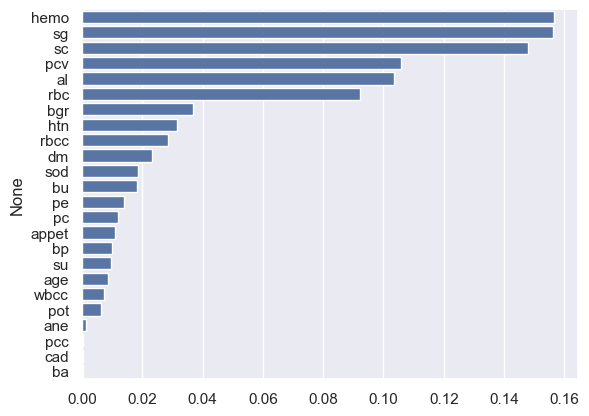

In [950]:
fea_imp = new_forest_model.feature_importances_

sorted_indices = fea_imp.argsort()[::-1]# read from the tail of the argsort to get greatest to least indices of the elements
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = fea_imp[sorted_indices]
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

We can see that the sc variable have more significant impact for the retrain model. 

## question 15

- yincheng zhu 1 ~ 7  400371892 
- Haoyuan Chen 8 ~ 13  400370821

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
